In [ ]:
# first accessing the dataset folder and within folder there is different label
import os
import matplotlib.pyplot as plt
import cv2 

face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

base_address = "C:/Users/Acer-nitro5/Desktop"

"""
creating the base_address to use to access the dataset folder and to save the cropped image 

folder -> to access the main dataset name: datasets
sub_folder -> to access all the list of the subfolder in the main datasets folder 

"""
folder = "C:/Users/Acer-nitro5/Desktop/datasets"
sub_folder= os.listdir(folder)


"""

save_root => to make the main folder to save the crop image 
by giving the path from the base_address and folder name is provided by the user 

to make the directory and checking if it already exist.

"""
save_root = os.path.join(base_address,"cropped_folder")
os.makedirs(save_root,exist_ok= True)



'''

accessing the label in the subfolder where subfolder holds all the labels with the help of list dir

1. Updating the path from the maindataset to the individual level
2. Updating the path from the save_root of cropped_image to the individual label only path is provided and directory is made


Then, accessing the path of individual images on the label 
1. join the path of the label with the image and file 
2. read the image 
3. convert the color into rgb

'''
for label in sub_folder: # to list all the folder inside the datasets 3 
    second_address = os.path.join(folder,label) # to add the file to the base adress
    save_label_to_root = os.path.join(save_root,label)
    os.makedirs(save_label_to_root,exist_ok=True)
 


    for file in os.listdir(second_address): # to show all the images inside 
        if file.endswith((".jpg",".png",".jpeg")):
            path = os.path.join(second_address,file) # to give the full path of the image 
            image = cv2.imread(path)
            image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
            # plt.imshow(image)
            # plt.show()

            # face detection using harcascade 
            gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
            faces = face_cascade.detectMultiScale(gray,scaleFactor=1.1,minNeighbors=7,minSize=(80,80))

            if len(faces) ==0:
                print("no faces found")
                continue
            if len(faces) > 0:
                
                x,y,w,h = max(faces, key=lambda rect:rect[2]*rect[3])
                
                '''

                why i am using the max here and not for loop to acess all the image because the loop takes one image at a time
                we are providing the certain condition of image having the maximum height and width of rectangle i.e provided by harcascade 
                and choosing the large value among them.


                '''
                cropped_image = gray[y:y+h,x:x+w]
                # plt.imshow(cropped_image)
                # plt.show()
                saving_image_to_label = os.path.join(save_label_to_root,file)
                print(saving_image_to_label)
                cv2.imwrite(saving_image_to_label,cropped_image)
print("cropping_done and save to each label")

            
        
    
 

C:/Users/Acer-nitro5/Desktop\cropped_folder\dhruba
C:/Users/Acer-nitro5/Desktop\cropped_folder\dhruba\DEE9BB10-071C-49D6-965B-667FEC96264F.jpg
C:/Users/Acer-nitro5/Desktop\cropped_folder\dhruba\FB_IMG_1705150951930.jpg
C:/Users/Acer-nitro5/Desktop\cropped_folder\dhruba\FB_IMG_1705160143482.jpg
C:/Users/Acer-nitro5/Desktop\cropped_folder\dhruba\IMG_20200410_174853.jpg
C:/Users/Acer-nitro5/Desktop\cropped_folder\dhruba\IMG_20200430_175514.jpg
C:/Users/Acer-nitro5/Desktop\cropped_folder\dhruba\IMG_20200501_190729.jpg
C:/Users/Acer-nitro5/Desktop\cropped_folder\dhruba\IMG_20200513_202220.jpg
C:/Users/Acer-nitro5/Desktop\cropped_folder\dhruba\IMG_20200518_175850_1.jpg
C:/Users/Acer-nitro5/Desktop\cropped_folder\dhruba\IMG_20200518_175918_1.jpg
C:/Users/Acer-nitro5/Desktop\cropped_folder\dhruba\IMG_20201026_075534.jpg
C:/Users/Acer-nitro5/Desktop\cropped_folder\dhruba\IMG_20201026_075535.jpg
C:/Users/Acer-nitro5/Desktop\cropped_folder\dhruba\IMG_20201026_075536.jpg
C:/Users/Acer-nitro5/Deskt

Starting with 30
Starting to write on the folder ........
Successfully saved the noised image into the folder ...............
Ended with 30
Starting with 30
Starting to write on the folder ........
Successfully saved the noised image into the folder ...............
Ended with 30
Starting with 30
Starting to write on the folder ........
Successfully saved the noised image into the folder ...............
Ended with 30
Starting with 30
Starting to write on the folder ........
Successfully saved the noised image into the folder ...............
Ended with 30
Starting with 30
Starting to write on the folder ........
Successfully saved the noised image into the folder ...............
Ended with 30
Starting with 30
Starting to write on the folder ........
Successfully saved the noised image into the folder ...............
Ended with 30
Starting with 30
Starting to write on the folder ........
Successfully saved the noised image into the folder ...............
Ended with 30
Starting with 30
Sta

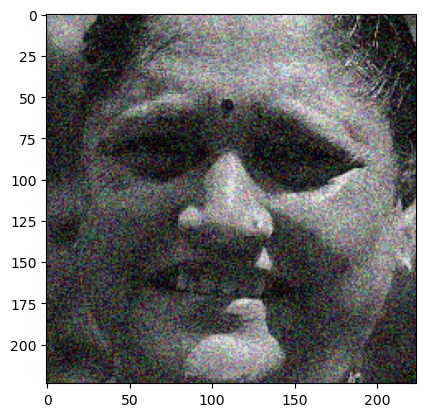

In [ ]:
import cv2
import os
import matplotlib.pyplot as plt
import random
import numpy as np

"""

Second_phase:
    data_augmentation 
    
"""
base_address = "C:/Users/Acer-nitro5/Desktop"

cropped_image_o_folder = os.path.join(base_address,"cropped_folder")
labels = os.listdir(cropped_image_o_folder)

save_the_augmentated_data = os.path.join(base_address,"augmented_dataset")
os.makedirs(save_the_augmentated_data,exist_ok=True)

set_image_size = (224,224)
for labels in os.listdir(cropped_image_o_folder):
    inside_the_m_folder = os.path.join(cropped_image_o_folder,labels)

    saving_augmented_image_to_label = os.path.join(save_the_augmentated_data,labels)
    os.makedirs(saving_augmented_image_to_label,exist_ok=True)

    # saving the original_image in the new augmentated data 
    for files in os.listdir(inside_the_m_folder):
        image_path = os.path.join(inside_the_m_folder,files)
        image = cv2.imread(image_path)
        resized_image = cv2.resize(image,set_image_size)

        # saving the resized original image into the labels
        cv2.imwrite(os.path.join(saving_augmented_image_to_label,files),resized_image)
        # plt.imshow(resized_image)
        # plt.show()
        # flipping the image vertically and horizontally
        flipped_image = cv2.flip(resized_image,1)
        cv2.imwrite(os.path.join(saving_augmented_image_to_label,"flip_"+files),flipped_image)
        # plt.imshow(flipped_image)
        # plt.show()
        w,h = set_image_size
        for angle in [-15,15]:
            M = cv2.getRotationMatrix2D((w//2,h//2),angle,1)
            rotated = cv2.warpAffine(resized_image,M,(w,h))
            cv2.imwrite(os.path.join(saving_augmented_image_to_label,f"rot{angle}_"+files),rotated)
            # plt.imshow(rotated)
            # plt.show()
             # Rotating and saving the image 

            # brightness and contrast
        alpha = random.uniform(0.9,1.3)
        beta = random.randint(-30,30)
        image_b_or_c = cv2.convertScaleAbs(resized_image,alpha=alpha,beta=beta)
        cv2.imwrite(os.path.join(saving_augmented_image_to_label,f"color"+files),image_b_or_c)
        # plt.imshow(image_b_or_c)
        # plt.show()
        # print(resized_image.shape)
        noises = np.zeros_like(resized_image,dtype=np.int16)
        print("Starting with 30")
        cv2.randn(noises,(0,0,0),(30,30,30))
        noisy_image3 = cv2.add(resized_image,noises,dtype=cv2.CV_8UC3)
        print("Starting to write on the folder ........")
        cv2.imwrite(os.path.join(saving_augmented_image_to_label,f"noised_image_"+files),noisy_image3)
        print("Successfully saved the noised image into the folder ...............")
        plt.imshow(noisy_image3)
        print("Ended with 30")
            

        

In [42]:
"""

    converting the image into pixels or vectors
    possible options 
    1. converting them into 1d array but that is not preffered slight brightness or contrast may affect the performance
    so, we convert them into vectors using the deepface 
    
"""
import os 
from deepface import DeepFace
import pandas as pd

base_address = "C:/Users/Acer-nitro5/Desktop"

augmented_folder = os.path.join(base_address,"augmented_dataset")
print(os.listdir(augmented_folder))
final_data = []
for labels in os.listdir(augmented_folder):
    print(labels)
    labels_path = os.path.join(augmented_folder,labels)
    
    for files in os.listdir(labels_path):
        images_path = os.path.join(labels_path,files)
        embedding = DeepFace.represent(
                        img_path=images_path,
                        model_name="ArcFace",  # or Facenet, VGG-Face, etc.
                        detector_backend="retinaface",  # best for faces
                        enforce_detection=False
                    )
        after_embedding = embedding[0]["embedding"]
        final_data.append({
            "label":labels,
            **{f"f_{i}": val for i,val in enumerate(after_embedding)}
        })
df_3 = pd.DataFrame(final_data)
df_3.to_csv("final_embedded_csv.csv",index=False)
print("The csv file is create successfully.....")
        


['dhruba', 'nabin', 'pabitra']
dhruba
nabin
pabitra
The csv file is create successfully.....


In [10]:
embedded_value = embedding[0]['embedding']
import pandas as pd 
data = []
data.append(["Dhruba",embedded_value])

In [11]:
df = pd.DataFrame(data,columns=['label','embedded_value'])
df.to_csv("embeddings_csv",index=False)
print("saved csv successfulyy")

saved csv successfulyy


In [25]:
data_1 = []
data_1.append({
    "label":"dhruba",
    **{f"f{i}":val for i,val in enumerate(embedded_value)}
})



In [26]:
print(data_1)

[{'label': 'dhruba', 'f0': 0.035702046006917953, 'f1': -0.1442205309867859, 'f2': 0.10078417509794235, 'f3': 0.15693281590938568, 'f4': 0.04794170707464218, 'f5': -0.05058702826499939, 'f6': 0.025696223601698875, 'f7': 0.04413864389061928, 'f8': 0.01617959886789322, 'f9': 0.03899013623595238, 'f10': 0.11460413038730621, 'f11': 0.04724414646625519, 'f12': -0.08273626118898392, 'f13': 0.08460383117198944, 'f14': -0.08942241221666336, 'f15': -0.05519702285528183, 'f16': 0.09513740241527557, 'f17': 0.0355403870344162, 'f18': 0.029155628755688667, 'f19': 0.04310481995344162, 'f20': 0.11534193158149719, 'f21': -0.03725579008460045, 'f22': 0.14617200195789337, 'f23': -0.2180437296628952, 'f24': -0.07644501328468323, 'f25': 0.06374894082546234, 'f26': -0.1355074793100357, 'f27': -0.070011205971241, 'f28': -0.16373750567436218, 'f29': 0.03465839475393295, 'f30': -0.2044978141784668, 'f31': -0.08729340136051178, 'f32': -0.07039877027273178, 'f33': 0.11864324659109116, 'f34': -0.12428124994039536

In [28]:
df_2 = pd.DataFrame(data_1)
df_2.to_csv("embedded_csv2.csv",index=False)


In [29]:
df_3 = pd.read_csv("embedded_csv2.csv")
df_3

,label,f0,f1,f2,f3,f4,f5,f6,f7,f8,...,f502,f503,f504,f505,f506,f507,f508,f509,f510,f511
0,dhruba,0.035702,-0.144221,0.100784,0.156933,0.047942,-0.050587,0.025696,0.044139,0.01618,...,0.100479,-0.162009,-0.033091,0.011354,-0.04634,0.01434,0.017723,0.01837,0.150237,-0.185123


In [48]:
df_4 = pd.read_csv("final_embedded_csv.csv")
df_4.head()
df_4.tail()
df_4.columns


Index(['label', 'f_0', 'f_1', 'f_2', 'f_3', 'f_4', 'f_5', 'f_6', 'f_7', 'f_8',
       ...
       'f_502', 'f_503', 'f_504', 'f_505', 'f_506', 'f_507', 'f_508', 'f_509',
       'f_510', 'f_511'],
      dtype='object', length=513)

(512,)


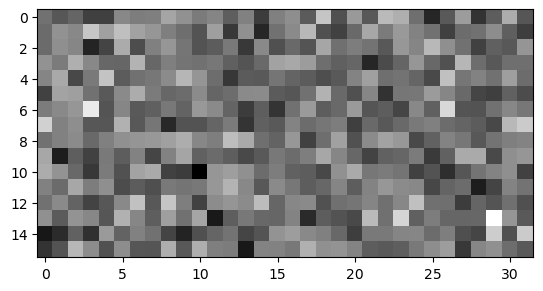

In [64]:
import matplotlib.pyplot as plt
digit = df_4.iloc[505,1:]
print(digit.shape)
digit = digit.astype(float)
digit = digit.values.reshape(16,32)
plt.imshow(digit,cmap='gray')
